# **Solving the Logistic Growth Equation with the Forward Euler Difference Equation**

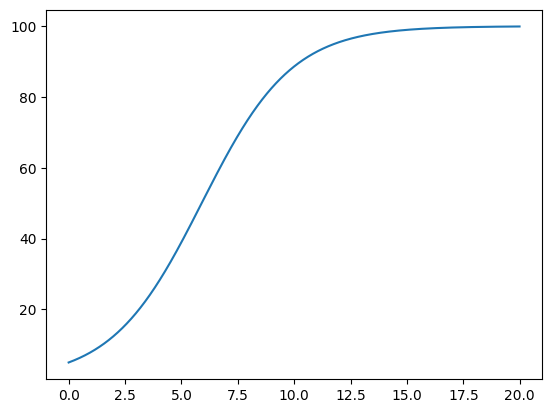

In [1]:



import numpy as np
import math
import matplotlib.pyplot as plt
deltat = 0.01 #step size
startt = 0 #timestart
stopt = 20 #timestop

mesh = int((stopt - startt)/deltat)

y = np.zeros(mesh)

time = np.zeros(mesh)
y[0] = 5
time[0] = 0
for i in range (1,mesh):
    y[i] = y[i-1] + deltat*0.5*y[i-1]*(1 - (y[i-1]/100))
    time[i] = time[i-1] + deltat
    

plt.plot(time, y)
    





# Solving Logistic Growth Using ODEINT Built-In Function

Above, we used a Forward-Euler solver to solve the Logistic Growth ODE.  This is a forward difference method to solve ODE's and we encoded this solver.  Now, we will solve the Logistic Growth ODE using the ODEINT function.  The ODEINT function is a built-in function that uses the LSODA algorithm to solve ODE's.  The LSODA algorithm automatically switches between Adams and BDF functions for stiff/nonstiff solver.  Using a built-in ODE solver also means the solver will automatically decide on the stepsize for you (above we chose step size 0.1). 


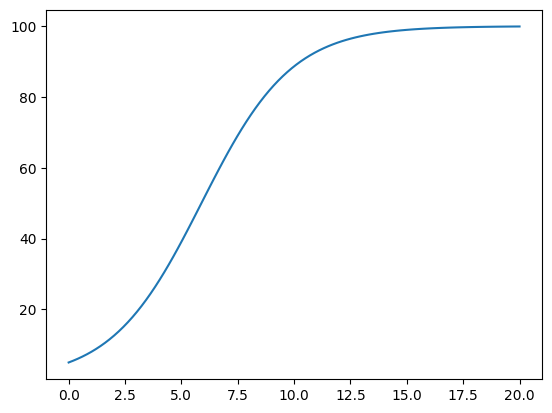

In [7]:
import scipy
from scipy.integrate import odeint

T = np.linspace(0,20, 100) #time mesh

def rhs(y, t, r, K):
    dydt =  r*y*(1 - (y/K))
    return dydt

y0 = 5 #initial condition
r = 0.5 #growth rate
K = 100 #Carrying capacity


solution = odeint(rhs, y0, T, args = (r, K))
plt.plot(T, solution[:,0])